In [1]:
%matplotlib notebook

# Bike Trippin

For this assignment, you will be taking "Cycle Share" data from Seattle and creating charts to determine which gender borrows and uses bikes more often.

* Import your dependencies and then import your data into a pandas data frame from the CSV within the 'Data' folder
* Split up your data into groups based upon the gender column
    * NOTE: There will be a garbage row with a gender of 'stoptime' which you will have to remove!
* Chart your data using a bar graph, giving it both a title and labels for the axes

In [2]:
#dependencies and load CSV
import pandas as pd
import matplotlib.pyplot as plt
import os

file_to_load = os.path.join("Resources", "trip.csv")
trip_df = pd.read_csv(file_to_load)
trip_df

C:\Users\Byron\anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960
1,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970
2,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988
3,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977
4,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971
...,...,...,...,...,...,...,...,...,...,...
286853,8/31/2016 23:45,SEA00201,679.532,Harvard Ave & E Pine St,2nd Ave & Spring St,CH-09,CBD-06,Short-Term Pass Holder,NaN,NaN
286854,9/1/2016 0:20,SEA00247,1965.418,Cal Anderson Park / 11th Ave & Pine St,6th Ave S & S King St,CH-08,ID-04,Short-Term Pass Holder,NaN,NaN
286855,9/1/2016 0:20,SEA00300,1951.173,Cal Anderson Park / 11th Ave & Pine St,6th Ave S & S King St,CH-08,ID-04,Short-Term Pass Holder,NaN,NaN
286856,9/1/2016 0:20,SEA00047,1883.299,Cal Anderson Park / 11th Ave & Pine St,6th Ave S & S King St,CH-08,ID-04,Short-Term Pass Holder,NaN,NaN


In [3]:
#locate "stoptime" row to be dropped
trip_df.loc[trip_df["gender"] == 'stoptime']

,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
50792,4/17/2015 19:21,SEA00362,17990.668,6th Ave S & S King St,Westlake Ave & 6th Ave,ID-04,"SLU-15trip_id""",starttime,stoptime,bikeid


In [4]:
#find null values
trip_df.isnull().sum() 

stoptime                  0
bikeid                    0
tripduration              0
from_station_name         0
to_station_name           0
from_station_id           0
to_station_id             0
usertype                  0
gender               105300
birthyear            105304
dtype: int64

In [5]:
#clean data
clean_trip_df = trip_df.drop(index=50792)
clean_trip_df = clean_trip_df.dropna()
clean_trip_df.isnull().sum()

stoptime             0
bikeid               0
tripduration         0
from_station_name    0
to_station_name      0
from_station_id      0
to_station_id        0
usertype             0
gender               0
birthyear            0
dtype: int64

In [6]:
clean_trip_df

,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960
1,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970
2,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988
3,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977
4,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971
...,...,...,...,...,...,...,...,...,...,...
286844,8/31/2016 22:04,SEA00499,308.484,E Harrison St & Broadway Ave E,Bellevue Ave & E Pine St,CH-02,CH-12,Member,Male,1989.0
286845,8/31/2016 22:17,SEA00074,905.417,Key Arena / 1st Ave N & Harrison St,Pier 66 / Alaskan Way & Bell St,SLU-19,WF-03,Member,Female,1974.0
286846,8/31/2016 22:17,SEA00448,879.160,Key Arena / 1st Ave N & Harrison St,Pier 66 / Alaskan Way & Bell St,SLU-19,WF-03,Member,Male,1981.0
286848,8/31/2016 22:25,SEA00254,674.993,3rd Ave & Broad St,Occidental Park / Occidental Ave S & S Washing...,BT-01,PS-04,Member,Male,1984.0


In [7]:
#create group based on values in gender column
gender_group = clean_trip_df.groupby('gender')

#count of values in group
count_gender = gender_group["gender"].count()
count_gender

gender
Female     37558
Male      140564
Other       3431
Name: gender, dtype: int64

In [8]:
plt.subplots(figsize=(7,6))
count_chart = count_gender.plot(kind="bar")
count_chart.set_title("Trips by Gender")
count_chart.set_xlabel("Gender")
count_chart.set_ylabel("Trips")

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Trips')

# Bonus!

You will now take the same base data frame before and create some code that will allow you to create individual pie charts for each bike. For this part of the activity, we want you to chart the total 'Trip Duration' of each bike, sorted by gender. Bonus points if you can come up with a method to do this without using loc or iloc to filter the original data frame! You can use loc to filter group data though.

In [10]:
# Group our data based upon 'bikeid' and 'gender'
bike_groups = clean_trip_df.groupby(['bikeid','gender'])

# Create a new variable that holds the sum of our groups
sum_it_up = bike_groups.sum()
sum_it_up.head(12)

tripduration
bikeid   gender              
SEA00001 Female     15876.665
         Male       41150.373
         Other        276.880
SEA00005 Female     20616.240
         Male       60386.328
         Other       1784.955
SEA00006 Female     20071.004
         Male       46584.453
         Other       1469.839
SEA00007 Female      9996.402
         Male       16618.213
         Other       1040.571

In [11]:
# Make a variable called bike_id and store a 'bikeid' in it
bike_id = "SEA00001"

# Collect the trips of the 'bikeid' above
just_one_bike = sum_it_up.loc[bike_id]

just_one_bike

,tripduration
gender,
Female,15876.665
Male,41150.373
Other,276.880


<IPython.core.display.Javascript object>


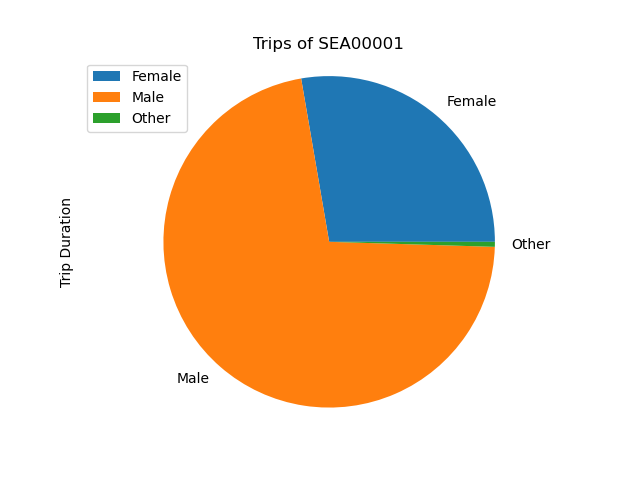

(-1.1147094275724618,
 1.1007004506069709,
 -1.1184745250918073,
 1.1115901234827354)

In [12]:
# Create a pie chart based upon the trip duration of that single bike
bike_pie = just_one_bike.plot(kind="pie", y='tripduration', title=("Trips of " + bike_id))
bike_pie.set_ylabel("Trip Duration")

plt.show()
plt.axis("equal")